# V01: A First Introduction to `aggregate`

**Objectives** Introduce aggregate probability distributions and the `aggregate` library for working with them. 

**Audience** New user with no knowlege of aggregate distributions or insurance.

**Prerequisites** Basic probability theory; Python and pandas programming.

**Context** Up next: `aggregate` for Actuarial Students.

**Overview**
1. Definition of aggregate (compound) probability distributions.
2. Applications and examples.
3. Installing the `aggregate` package.
4. Simple discrete examples illustrating using dice throws.
5. Determining moments of and plotting aggregate distributions.

# V02: `aggregate` for Actuarial Students 

**Objectives** Introduce aggregate probability distributions and the `aggregate` library for working with them in the context of exam and university courses in actuarial modeling. 

**Audience** Actuarial science university student or junior analyst working in insurance.

**Prerequisites** V01 plus familiarity with aggregate probability distribution (as covered on SOA STAM, CAS MAS I, IFOA CS-2) and basic insurance terminology (insurance company operations).

**Context** Up next: `aggregate` for Actuaries.

**Overview**
1. Installing the `aggregate` package.
2. Working with simple discrete aggregate probability distributions.
3. Determining moments of and plotting aggregate distributions.

# V03: `aggregate` for Actuaries 

**Objectives** Introduce aggregate probability distributions and the `aggregate` library for working with then in the context of real-world, but basic, actuarial problems 
illustrated using the Tweedie distribution from GLM modeling. 

**Audience** Actuaries at the Associate or Fellow level.

**Prerequisites** V02 plus awareness of the use aggregate probability distribution in insurance (as covered on CAS Part 8).

**Context** Up next: `aggregate` for individual risk pricing actuaries.

**Overview**
1. Installing the `aggregate` package.
2. Computing an aggregate distribution for a portfolio of risks with given frequency, severity, limit, and attachment assumptions.
3. Different ways to determine exposure (prem x lr; claim count; losses).
4. Determining limited expected values.

# Introductions to `aggregate`

| Audience                        | `Underwriter`   | Features and Prerequisites                                                                          | Problems                               |
|:--------------------------------|:----------------|:----------------------------------------------------------------------------------------------------|:---------------------------------------|
| Novice                          | `student_build`  | Intro to aggregate distributions in general language; simple discrete examples                      |                                        |
| Actuarial students              | `student_bulid` | Similar to novice but using insurance terminology                                                   | SOA STAM, CAS MAS1, IFOA CS2, KPW, LDA |
| Actuaries                       | `actuary_build` | Introduction using the Tweedie distribution as motivation                                           | CAS Part 8                             |
| Individual risk pricing actuary | `actuary_build`      | LEV, ILFs, layering, aggregate insurance charge (Table L, M); solving problems from CAS             | CAS Part 8                             |
| Reinsurance pricing actuary     | `actuary_build`      | Exposure rating, swings and slides, aggregate stop loss                                             | CAS Part 8                             |
| Reserving actuary               | `actuary_build` | Loss emergence, IBNR and case reserve ranges                                                        |                                        |
| Capital modeler                 | `capital_build` | Use of samples, VaR, TVaR, tail evaluation, risk drivers; Iman-Conover; rearrangement algorithm     | CAS Part 9                             |
| Strategic planning              | `capital_build`   | Capital allocation in a portfolio; alternative pricing methodologies; bounds on net/gross pricing   | CAS Part 9                             |
| Catastrophe modeler             | `capital_build`     | Thick tailed Poisson Pareto and lognormal models; aggregate PMLs; occurrence and aggregate layering | CAS Part 9                             |
| Act Sci or Risk Mgmt professor  | `student_build` | Solving text book problems (similar to Student intro); generate realistic, motivating examples      |                                        |
| Developer                       | `dev_build`     | Class model, `agg` language grammar, internal design                                                |                                        |
| Debugger                        | `debug_build`   | Watch inner workings!                                                                               |                                        |                                                                                                |                                        |

For each audience there is a customized `Underwriter` object 

## Basic prequisies for all introductions

* Basic probability including discrete and continuous distributions, mean, variance, standard deviation, pdf, cdf. 
* Python programming, including familiarity with `pandas`. `numpy`, `matplotlib`, and `scipy.stats` useful but not essential.



## Provenance

* Oct 2022 created new 


In [6]:
p = Path.home() / 'aggregate/databases'
p = Path.home() / 'agg'
p = Path('/s/telos/python/aggregate_project/aggregate/agg')


time: 0 ns (started: 2022-10-28 20:43:25 +01:00)


In [7]:
p.exists()

True

time: 0 ns (started: 2022-10-28 20:43:25 +01:00)


In [14]:
entries = []
for fn in p.glob('*.agg'):
    txt = fn.read_text(encoding='utf-8')
    stxt = txt.split('\n')
    for r in stxt:
        rs = r.split(' ')
        if rs[0] in ['agg', 'port', 'dist', 'distortion', 'sev']:
            entries.append(rs[:2])

time: 0 ns (started: 2022-10-28 20:46:34 +01:00)


In [15]:
pd.DataFrame(entries, columns=['kind', 'name'])

,kind,name
0,sev,One
1,agg,Basic.Dice.Roll
2,agg,Basic.Twelve.Dice.Rolls
3,agg,Basic.Poisson.Dice.Rolls
4,agg,Basic.Tweedie
...,...,...
156,agg,I.Re15
157,agg,J.Tweedie0
158,agg,J.Tweedie1
159,agg,J.Tweedie2


time: 0 ns (started: 2022-10-28 20:46:48 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 843 ms (started: 2022-10-28 20:51:40 +01:00)


In [2]:
build.knowledge

spec  \
kind name                                                                                          
agg  A.Basic01   {'name': 'A.Basic01', 'freq_name': 'empirical', 'freq_a': [1.0], 'freq_b': [...   
     A.Basic02   {'name': 'A.Basic02', 'freq_name': 'empirical', 'freq_a': [12.0], 'freq_b': ...   
     A.Basic03   {'name': 'A.Basic03', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
     A.Basic04   {'name': 'A.Basic04', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
     A.Basic05   {'name': 'A.Basic05', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
...                                                                                          ...   
sev  directorsB  {'sev_name': 'lognorm', 'sev_mean': 10000000.0, 'sev_cv': 1.75, 'sev_scale':...   
     directorsC  {'sev_name': 'lognorm', 'sev_mean': 10000000.0, 'sev_cv': 2.0, 'sev_scale': ...   
     liaba       {'sev_name': 'lognorm', 'sev_mean': 50.0, 'sev_cv': 1.0, 'sev_scale': 1.0, '...   
     liabb       {'sev_name': 'lognorm', 'sev_mean': 24.0, 'sev_cv': 1.5, 'sev_scale': 1.0, '...   
     liabc       {'sev_name': 'lognorm', 'sev_mean': 50.0, 'sev_cv': 2.0, 'sev_scale': 1.0, '...   

                                                                                         program  
kind name                                                                                         
agg  A.Basic01   agg A.Basic01 dfreq  [1]  dsev  [0 1]                                   note...  
     A.Basic02   agg A.Basic02 dfreq  [12]  dsev  [0 1]                                  note...  
     A.Basic03   agg A.Basic03 dfreq  [1 2 3]  dsev  [1 2 10]                            note...  
     A.Basic04   agg A.Basic04 dfreq  [1 2 3]   [.5 1/4 1/4]  dsev  [1 2 10]               no...  
     A.Basic05   agg A.Basic05 dfreq  [1 2 3]    dsev  [1 2 10]   [.4 .4 .2]               no...  
...                                                                                          ...  
sev  directorsB  sev directorsB lognorm 10000000 cv 1.75 note{directors and officers liabilit...  
     directorsC  sev directorsC lognorm 10000000 cv 2.0  note{directors and officers liabilit...  
     liaba                       sev liaba lognorm 50 cv 1.0 note{prems ops A, lognormal cv=1.0}  
     liabb                       sev liabb lognorm 24 cv 1.5 note{prems ops B, lognormal cv=1.5}  
     liabc                       sev liabc lognorm 50 cv 2.0 note{prems ops C, lognormal cv=2.0}  

[159 rows x 2 columns]

time: 31 ms (started: 2022-10-28 20:51:41 +01:00)


In [1]:
from aggregate import build
from aggregate.utilities import make_mosaic_figure, show_fig

Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 1.01 s (started: 2022-10-28 21:46:34 +01:00)


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.000,1.000,0.000,0.000,0.000,,
Freq,3.500,,,487.950m,,,0.000
Agg,3.500,3.500,222.045a,487.950m,487.950m,888.178a,0.000


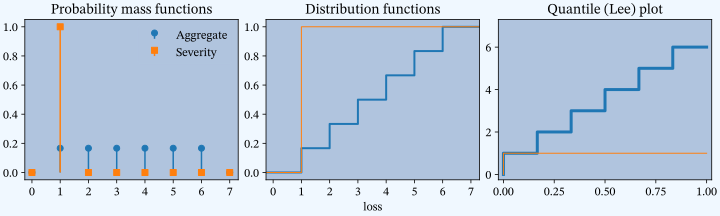

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,5.000,,,447.214m,,,447.214m
Agg,17.500,17.500,-1.665f,497.613m,497.613m,-127.676f,556.503m


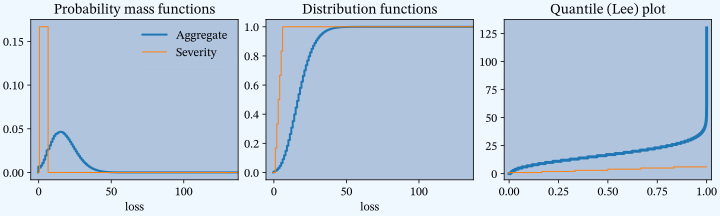

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,5.000,,,0.000,,,
Agg,17.500,17.500,-444.089a,218.218m,218.218m,-11.213f,0.000


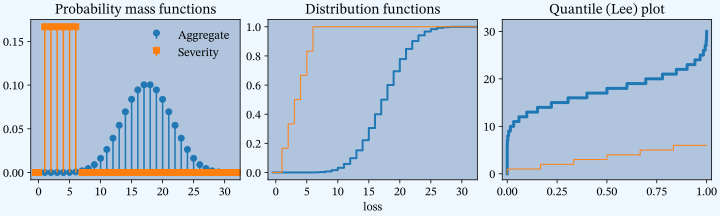

time: 1.34 s (started: 2022-10-28 21:17:47 +01:00)


In [8]:
ans, df = build.show('B.*Roll', logger_level=30)

In [10]:
act = build('agg Tw1 10 claims sev gamma 100 cv 0.5 poisson')
act

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,100.000,100.000,400.575p,500.000m,500.000m,63.030n,1000.000m
Freq,10.000,,,316.228m,,,316.228m
Agg,1000.000,1000.000,-377.837p,353.553m,353.553m,6.547n,424.264m


time: 203 ms (started: 2022-10-28 21:18:58 +01:00)


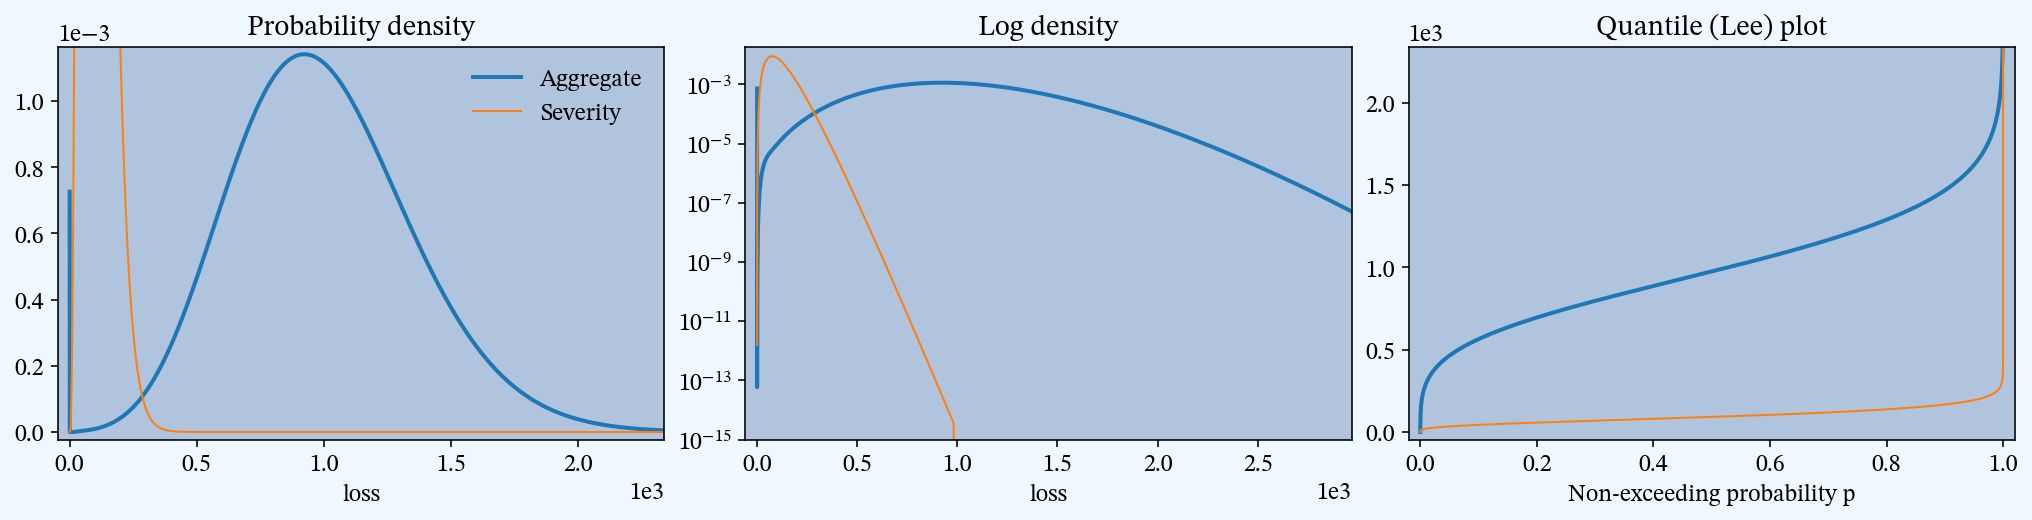

time: 922 ms (started: 2022-10-28 21:19:04 +01:00)


In [11]:
act.plot()

In [14]:
act.density_df.loc[0, 'p'], np.exp(-10)

(4.539992976253098e-05, 4.5399929762484854e-05)

time: 0 ns (started: 2022-10-28 21:19:46 +01:00)


In [16]:
a = 4  # 1/cv**2; Var agg = lambda EX2= lambda beta**2 a(a+1), cv =  sqrt(a+1 / lambda alpha) 
cv = np.sqrt((a+1) / (10 * a)) 
cv

0.3535533905932738

time: 0 ns (started: 2022-10-28 21:21:17 +01:00)


In [18]:
from aggregate.utilities import tweedie_convert

time: 0 ns (started: 2022-10-28 21:22:45 +01:00)


In [32]:
tweedie_convert(λ=10, m=100, cv=0.5) 

μ           1.000k
p            1.200
σ^2         31.399
λ           10.000
α            4.000
β           25.000
tw_cv     353.553m
sev_m      100.000
sev_cv    500.000m
p0         45.400u
dtype: float64

time: 0 ns (started: 2022-10-28 21:26:03 +01:00)


In [27]:
# mean, p, disperson format: 
act2 = build('agg Tw2 tweedie 1000 1.2 31.3985803938698')
act2

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,100.000,100.000,400.572p,500.000m,500.000m,63.030n,1000.000m
Freq,10.000,,,316.228m,,,316.228m
Agg,1000.000,1000.000,-377.842p,353.553m,353.553m,6.547n,424.264m


time: 203 ms (started: 2022-10-28 21:24:02 +01:00)


<AxesSubplot:xlabel='loss'>

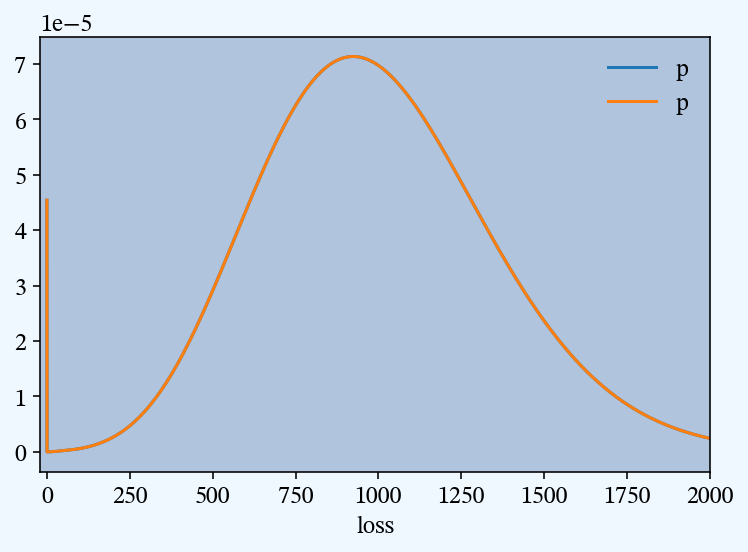

time: 235 ms (started: 2022-10-28 21:25:10 +01:00)


In [31]:
pd.concat((act.density_df.p, act2.density_df.p), axis=1).plot(xlim=[-20, 2000])

In [34]:
welcome(rows=162)

time: 0 ns (started: 2022-10-28 21:30:11 +01:00)


In [35]:
build.knowledge

spec  \
kind name                                                                                                             
agg  A.Basic01                      {'name': 'A.Basic01', 'freq_name': 'empirical', 'freq_a': [1.0], 'freq_b': [...   
     A.Basic02                      {'name': 'A.Basic02', 'freq_name': 'empirical', 'freq_a': [12.0], 'freq_b': ...   
     A.Basic03                      {'name': 'A.Basic03', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
     A.Basic04                      {'name': 'A.Basic04', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
     A.Basic05                      {'name': 'A.Basic05', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
     A.Basic06                      {'name': 'A.Basic06', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
     A.Basic07                      {'name': 'A.Basic07', 'freq_name': 'empirical', 'freq_a': [0.0, 1.0, 2.0], '...   
     A.Basic08                      {'name': 'A.Basic08', 'freq_name': 'empirical', 'freq_a': [0.0, 1.0, 2.0], '...   
     A.Basic09                      {'name': 'A.Basic09', 'freq_name': 'empirical', 'freq_a': [0.0, 1.0, 2.0], '...   
     B.Freq.Bernoulli               {'name': 'B.Freq.Bernoulli', 'exp_en': 0.8, 'sev_name': 'dhistogram', 'sev_x...   
     B.Freq.Beta                    {'name': 'B.Freq.Beta', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs': ...   
     B.Freq.Binomial                {'name': 'B.Freq.Binomial', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_x...   
     B.Freq.Delaporte               {'name': 'B.Freq.Delaporte', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_...   
     B.Freq.Fixed                   {'name': 'B.Freq.Fixed', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs':...   
     B.Freq.IG                      {'name': 'B.Freq.IG', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs': [1...   
     B.Freq.NegBin                  {'name': 'B.Freq.NegBin', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs'...   
     B.Freq.Pascal                  {'name': 'B.Freq.Pascal', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs'...   
     B.Freq.Poisson                 {'name': 'B.Freq.Poisson', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs...   
     B.Freq.SIG                     {'name': 'B.Freq.SIG', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs': [...   
     B.Freq.Sichel                  {'name': 'B.Freq.Sichel', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs'...   
     B.Freq.Sichel.gamma            {'name': 'B.Freq.Sichel.gamma', 'exp_en': 10.0, 'sev_name': 'dhistogram', 's...   
     B.Freq.Sichel.ig               {'name': 'B.Freq.Sichel.ig', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_...   
     Basic.Dice.Roll                {'name': 'Basic.Dice.Roll', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3...   
     Basic.Poisson.Dice.Rolls       {'name': 'Basic.Poisson.Dice.Rolls', 'exp_en': 5.0, 'sev_name': 'dhistogram'...   
     Basic.Tweedie                  {'name': 'Basic.Tweedie', 'exp_en': 70.10637160891034, 'freq_name': 'poisson...   
     Basic.Twelve.Dice.Rolls        {'name': 'Basic.Twelve.Dice.Rolls', 'freq_name': 'empirical', 'freq_a': [5.0...   
     C.Sev01                        {'name': 'C.Sev01', 'exp_en': 1.0, 'sev_name': 'expon', 'sev_scale': 100.0, ...   
     C.Sev02                        {'name': 'C.Sev02', 'exp_en': 1.0, 'sev_name': 'expon', 'sev_a': 1.0, 'sev_w...   
     C.Sev03                        {'name': 'C.Sev03', 'exp_en': 1.0, 'sev_name': 'expon', 'sev_scale': 100.0, ...   
     C.Sev04                        {'name': 'C.Sev04', 'exp_en': 1.0, 'sev_name': 'norm', 'sev_scale': 100.0, '...   
     C.Sev05                        {'name': 'C.Sev05', 'exp_en': 1.0, 'sev_name': 'uniform', 'sev_scale': 100.0...   
     C.Sev06                        {'name': 'C.Sev06', 'exp_en': 1.0, 'sev_name': 'gamma', 'sev_a': 0.3, 'sev_w...   
     C.Sev07                        {'name': 'C.Sev07', 'exp_en':

time: 141 ms (started: 2022-10-28 21:30:12 +01:00)


In [3]:
build

time: 0 ns (started: 2022-10-28 22:19:24 +01:00)


In [16]:
from aggregate.utilities import pprint
build.show('^A.*', 'agg', False, False).program.apply(lambda x: pprint(x, html=True));

time: 31 ms (started: 2022-10-28 22:22:55 +01:00)


time: 0 ns (started: 2022-10-28 22:20:42 +01:00)


In [8]:
pprint?

time: 0 ns (started: 2022-10-28 22:20:45 +01:00)


Signature: pprint(txt, split=0, html=False, tacit=False)
Docstring:
Try to format an agg program. This is impractical now - dfreq and dsev, optional
reinsurance, etc. Go for a simple approach of removing unnecessary spacing
and removing notes. Notes can be accessed from the spec that is always to hand.

For long programs use split=60 or so, they are split at appropriate points.

:param txt: program text input
:param tacit: if True pp is silent, else it outputs.
File:      c:\users\steve\documents\cloudstation\telos\python\aggregate_project\aggregate\utilities.py
Type:      function


In [1]:
from aggregate import build

Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 922 ms (started: 2022-10-28 23:20:51 +01:00)


In [27]:
# a = build('agg CAT 1.7 claims sev 1000 * pareto 1.7 - 1700 poisson', update=False, log2=18)
a = build('agg NONCAT 5 claims sev lognorm 100 cv [.4 .8 1 2] wts=4 mixed gamma .4', update=True, log2=18)

time: 1 s (started: 2022-10-28 23:26:42 +01:00)


In [28]:
a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,100.000,99.730,-2.698m,1.204,1.127,-63.830m,16.834
Freq,5.000,,,600.000m,,,866.667m
Agg,500.000,497.872,-4.257m,806.226m,777.775m,-35.289m,3.198


time: 15 ms (started: 2022-10-28 23:26:44 +01:00)


In [29]:
a.describe

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,100.000,99.730,-2.698m,1.204,1.127,-63.830m,16.834
Freq,5.000,,,600.000m,,,866.667m
Agg,500.000,497.872,-4.257m,806.226m,777.775m,-35.289m,3.198


time: 16 ms (started: 2022-10-28 23:26:46 +01:00)


In [35]:
a.statistics_df.T

,0,1,2,3
name,NONCAT,NONCAT,NONCAT,NONCAT
limit,inf,inf,inf,inf
attachment,0,0,0,0
sevcv_param,400.000m,800.000m,1.000,2.000
el,125.000,125.000,125.000,125.000
prem,0.000,0.000,0.000,0.000
lr,0.000,0.000,0.000,0.000
freq_1,1.250,1.250,1.250,1.250
freq_2,3.062,3.062,3.062,3.062
freq_3,9.678,9.678,9.678,9.678


time: 31 ms (started: 2022-10-28 23:27:23 +01:00)


In [32]:
a.statistics_total_df

,name,limit,attachment,sevcv_param,el,prem,lr,freq_1,freq_2,freq_3,...,sev_cv,sev_skew,agg_1,agg_2,agg_3,agg_m,agg_cv,agg_skew,mix_cv,wt
mixed,NONCAT,inf,0.000,0,500.000,0.000,NaN,5.000,34.000,283.400,...,1.204,16.834,500.000,412.500k,578.266M,500.000,806.226m,3.198,400.000m,1.000
independent,NONCAT,inf,0.000,0,500.000,0.000,NaN,5.000,31.000,223.400,...,1.204,16.834,500.000,382.500k,505.216M,500.000,728.011m,3.762,400.000m,1.000


time: 16 ms (started: 2022-10-28 23:27:03 +01:00)


In [33]:
a.audit_df

,name,limit,attachment,el,freq_1,freq_cv,freq_skew,sev_1,sev_cv,sev_skew,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_sev_skew,emp_agg_1,emp_agg_cv,emp_agg_skew
0,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,400.000m,1.264,125.000,1.043,1.318,NaN,NaN,NaN,NaN,NaN,NaN
1,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,800.000m,2.912,125.000,1.213,1.962,NaN,NaN,NaN,NaN,NaN,NaN
2,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,1.000,4.000,125.000,1.327,2.544,NaN,NaN,NaN,NaN,NaN,NaN
3,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,2.000,14.000,125.000,2.040,9.661,NaN,NaN,NaN,NaN,NaN,NaN
mixed,NONCAT,inf,0.000,500.000,5.000,600.000m,866.667m,100.000,1.204,16.834,500.000,806.226m,3.198,99.730,1.127,7.954,497.872,777.775m,1.767


time: 16 ms (started: 2022-10-28 23:27:06 +01:00)


In [34]:
a.report_df

view,0,1,2,3,independent,mixed,empirical,error
statistic,,,,,,,,
name,NONCAT,NONCAT,NONCAT,NONCAT,NONCAT,NONCAT,,
limit,inf,inf,inf,inf,inf,inf,,
attachment,0,0,0,0,0.000,0.000,,
el,125.000,125.000,125.000,125.000,500.000,500.000,,
freq_m,1.250,1.250,1.250,1.250,5.000,5.000,,
freq_cv,979.796m,979.796m,979.796m,979.796m,489.898m,600.000m,,
freq_skew,1.143,1.143,1.143,1.143,571.548m,866.667m,,
sev_m,100.000,100.000,100.000,100.000,100.000,100.000,99.730,-2.698m
sev_cv,400.000m,800.000m,1.000,2.000,1.204,1.204,1.127,-63.830m


time: 16 ms (started: 2022-10-28 23:27:09 +01:00)


In [10]:
a.recommend_bucket(16)

0.0

time: 0 ns (started: 2022-10-28 23:21:07 +01:00)


In [9]:
a

,E(X),CV(X),Skew(X)
X,,,
Sev,728.571,,
Freq,1.700,766.965m,766.965m
Agg,1.239k,,


time: 0 ns (started: 2022-10-28 23:21:01 +01:00)


In [14]:
a.sev_cdf(1000000)

0.9999920796211648

time: 0 ns (started: 2022-10-28 23:22:07 +01:00)


In [15]:
1e6 / 2**18

3.814697265625

time: 0 ns (started: 2022-10-28 23:22:13 +01:00)


In [16]:
a.update(log2=18, bs=4)

time: 125 ms (started: 2022-10-28 23:22:27 +01:00)


In [17]:
a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,728.571,966.723,326.875m,,6.000,,
Freq,1.700,,,766.965m,,,766.965m
Agg,1.239k,1.643k,326.845m,,4.664,,


time: 16 ms (started: 2022-10-28 23:22:28 +01:00)


In [36]:
a.audit_df

,name,limit,attachment,el,freq_1,freq_cv,freq_skew,sev_1,sev_cv,sev_skew,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_sev_skew,emp_agg_1,emp_agg_cv,emp_agg_skew
0,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,400.000m,1.264,125.000,1.043,1.318,NaN,NaN,NaN,NaN,NaN,NaN
1,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,800.000m,2.912,125.000,1.213,1.962,NaN,NaN,NaN,NaN,NaN,NaN
2,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,1.000,4.000,125.000,1.327,2.544,NaN,NaN,NaN,NaN,NaN,NaN
3,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,2.000,14.000,125.000,2.040,9.661,NaN,NaN,NaN,NaN,NaN,NaN
mixed,NONCAT,inf,0.000,500.000,5.000,600.000m,866.667m,100.000,1.204,16.834,500.000,806.226m,3.198,99.730,1.127,7.954,497.872,777.775m,1.767


time: 32 ms (started: 2022-10-28 23:28:03 +01:00)


In [48]:
df = a.audit_df.copy()

time: 0 ns (started: 2022-10-28 23:30:33 +01:00)


In [49]:
df.columns = df.columns.str.split('_', n=2, expand=True)

AttributeError: 'MultiIndex' object has no attribute 'replace'

time: 15 ms (started: 2022-10-28 23:30:33 +01:00)


In [46]:
df

name limit attachment       el   freq                          sev  \
          NaN   NaN        NaN      NaN      1        cv      skew        1   
          NaN   NaN        NaN      NaN    NaN       NaN       NaN      NaN   
0      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
1      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
2      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
3      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
mixed  NONCAT   inf      0.000  500.000  5.000  600.000m  866.667m  100.000   

                             agg                      emp                \
             cv    skew        m        cv   skew     sev                 
            NaN     NaN      NaN       NaN    NaN       1     cv   skew   
0      400.000m   1.264  125.000     1.043  1.318     NaN    NaN    NaN   
1      800.000m   2.912  125.000     1.213  1.962     NaN    NaN    NaN   
2         1.000   4.000  125.000     1.327  2.544     NaN    NaN    NaN   
3         2.000  14.000  125.000     2.040  9.661     NaN    NaN    NaN   
mixed     1.204  16.834  500.000  806.226m  3.198  99.730  1.127  7.954   

                                 
           agg                   
             1        cv   skew  
0          NaN       NaN    NaN  
1          NaN       NaN    NaN  
2          NaN       NaN    NaN  
3          NaN       NaN    NaN  
mixed  497.872  777.775m  1.767

time: 32 ms (started: 2022-10-28 23:29:58 +01:00)


In [47]:
df.replace(np.nan, '')

name limit attachment       el   freq                          sev  \
          NaN   NaN        NaN      NaN      1        cv      skew        1   
          NaN   NaN        NaN      NaN    NaN       NaN       NaN      NaN   
0      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
1      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
2      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
3      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
mixed  NONCAT   inf      0.000  500.000  5.000  600.000m  866.667m  100.000   

                             agg                      emp                \
             cv    skew        m        cv   skew     sev                 
            NaN     NaN      NaN       NaN    NaN       1     cv   skew   
0      400.000m   1.264  125.000     1.043  1.318                         
1      800.000m   2.912  125.000     1.213  1.962                         
2         1.000   4.000  125.000     1.327  2.544                         
3         2.000  14.000  125.000     2.040  9.661                         
mixed     1.204  16.834  500.000  806.226m  3.198  99.730  1.127  7.954   

                                 
           agg                   
             1        cv   skew  
0                                
1                                
2                                
3                                
mixed  497.872  777.775m  1.767

time: 31 ms (started: 2022-10-28 23:30:19 +01:00)
